In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (15, 10)

In [3]:
tesla = pd.read_csv('TSLA.csv')
tesla = tesla[['Date','Open','High','Low','Close']]
print(tesla.shape)
tesla.head()

(251, 5)


,Date,Open,High,Low,Close
0,2018-03-23,311.250000,311.250000,300.450012,301.540009
1,2018-03-26,307.339996,307.589996,291.359985,304.179993
2,2018-03-27,304.000000,304.269989,277.179993,279.179993
3,2018-03-28,264.579987,268.679993,252.100006,257.779999
4,2018-03-29,256.489990,270.959991,248.210007,266.130005


C:\ProgramData\Anaconda3\envs\tensorflow-cpu\lib\site-packages\mpl_finance.py:16: DeprecationWarning: 



    Please use `mplfinance` instead (no hyphen, no underscore).

    To install: `pip install --upgrade mplfinance` 

   For more information, see: https://pypi.org/project/mplfinance/


  __warnings.warn('\n\n  ================================================================='+


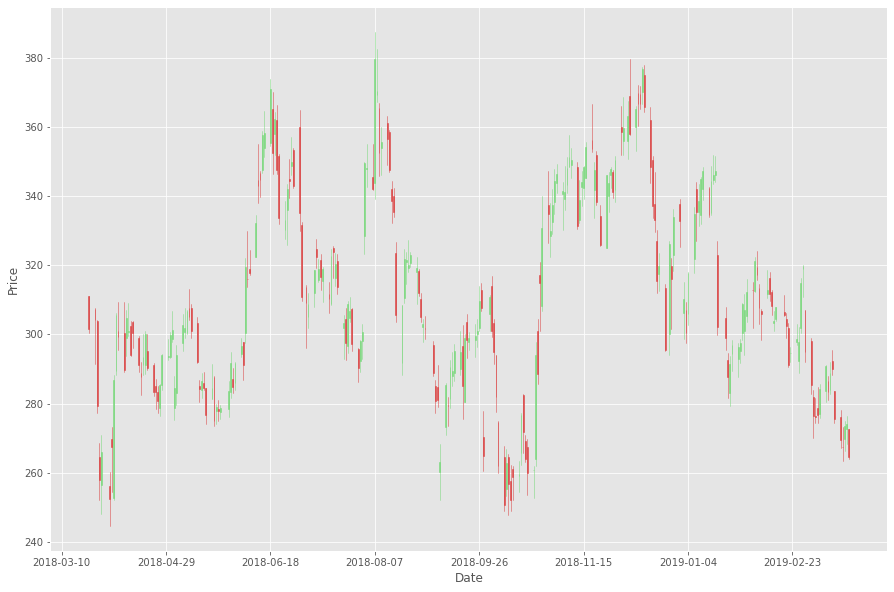

In [4]:
import matplotlib.ticker as mticker
from mpl_finance import candlestick_ohlc
from datetime import date
from matplotlib.dates import date2num
import matplotlib.dates as mdates
import matplotlib.ticker as mticker

df_cp = tesla.copy()
df_cp.Date = date2num(pd.to_datetime(tesla.Date).dt.to_pydatetime())
ax1 = plt.subplot2grid((1,1), (0,0))
candlestick_ohlc(ax1,df_cp.values, width=0.4, colorup='#77d879', colordown='#db3f3f',alpha=2)
x_range = np.arange(df_cp.shape[0])
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax1.xaxis.set_major_locator(mticker.MaxNLocator(10))
ax1.grid(True)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

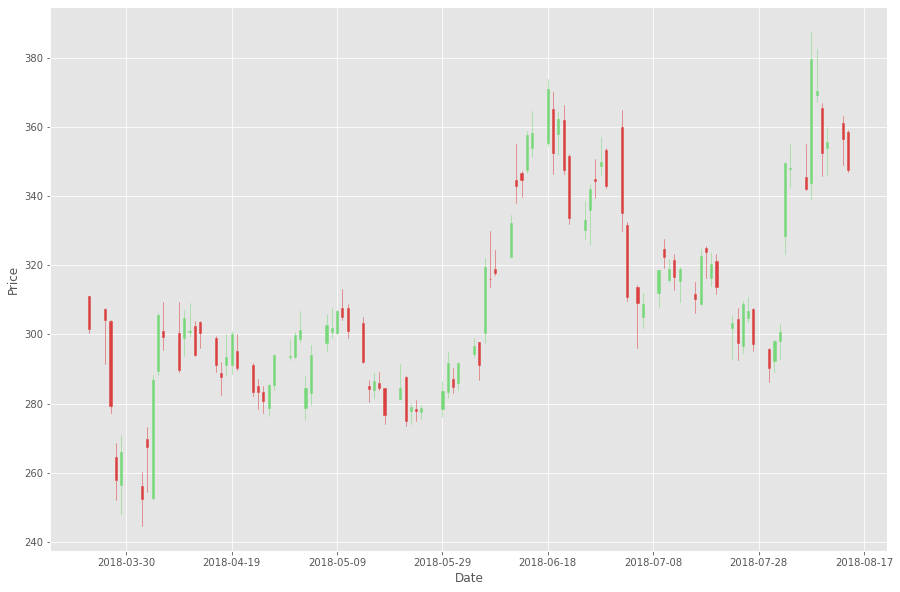

In [5]:
ax1 = plt.subplot2grid((1,1), (0,0))
ret=candlestick_ohlc(ax1,df_cp.iloc[:100,:].values, width=0.4, colorup='#77d879', colordown='#db3f3f',alpha=2)
x_range = np.arange(df_cp.shape[0])
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax1.xaxis.set_major_locator(mticker.MaxNLocator(10))
ax1.grid(True)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

<AxesSubplot:>

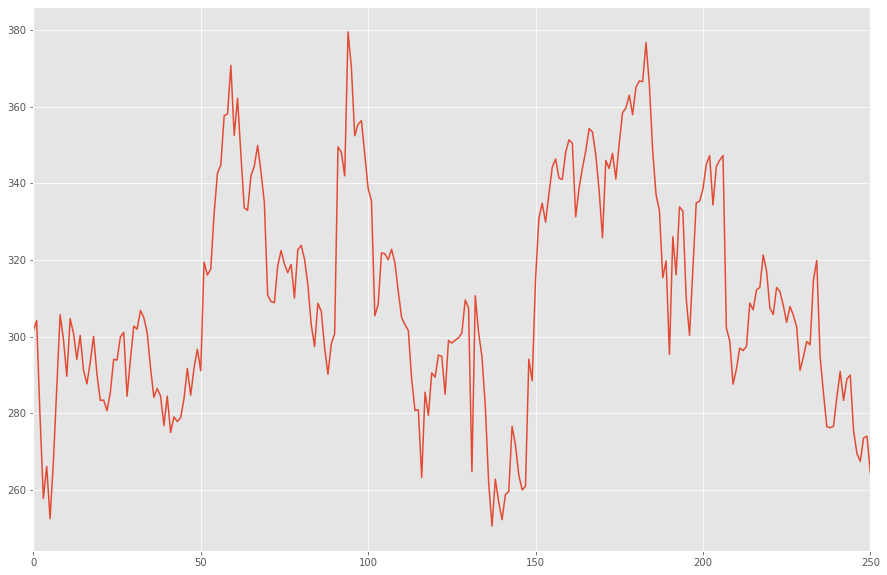

In [6]:
tesla.Close.plot()

<AxesSubplot:>

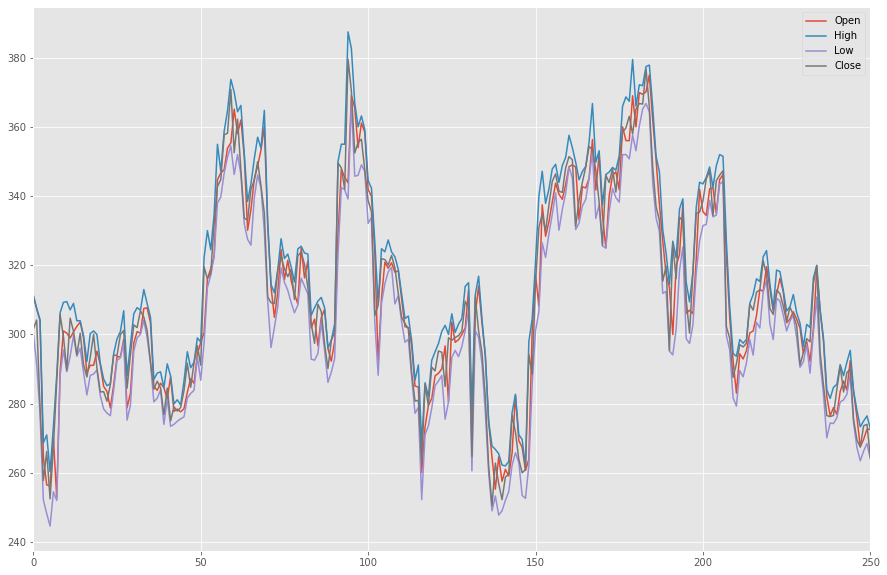

In [7]:
tesla.plot(kind = "line", y = ['Open', 'High', 'Low','Close'])

<AxesSubplot:ylabel='Frequency'>

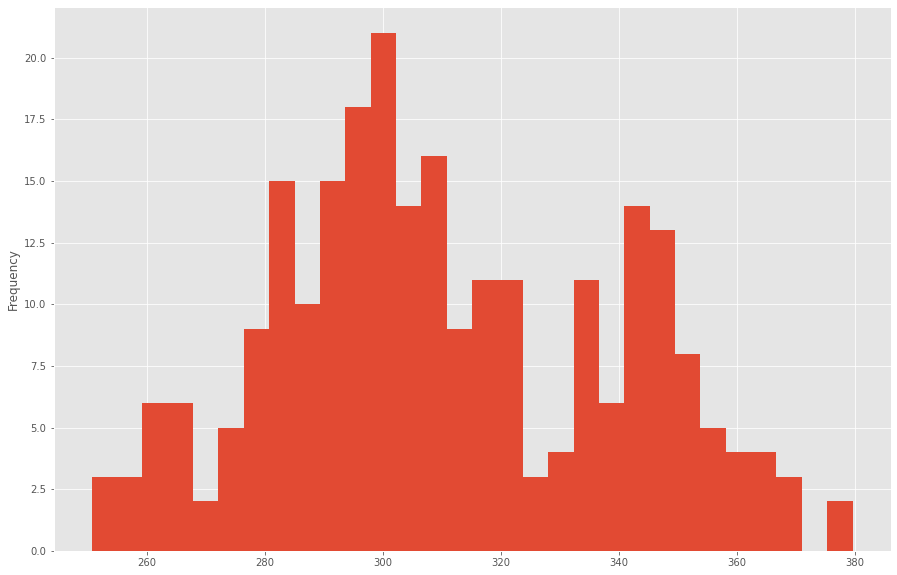

In [8]:
tesla.Close.plot(kind = "hist", bins = 30)

In [9]:
tesla['Closelog'] = np.log(tesla.Close)
tesla.head()

,Date,Open,High,Low,Close,Closelog
0,2018-03-23,311.250000,311.250000,300.450012,301.540009,5.708903
1,2018-03-26,307.339996,307.589996,291.359985,304.179993,5.717620
2,2018-03-27,304.000000,304.269989,277.179993,279.179993,5.631857
3,2018-03-28,264.579987,268.679993,252.100006,257.779999,5.552107
4,2018-03-29,256.489990,270.959991,248.210007,266.130005,5.583985


<AxesSubplot:ylabel='Frequency'>

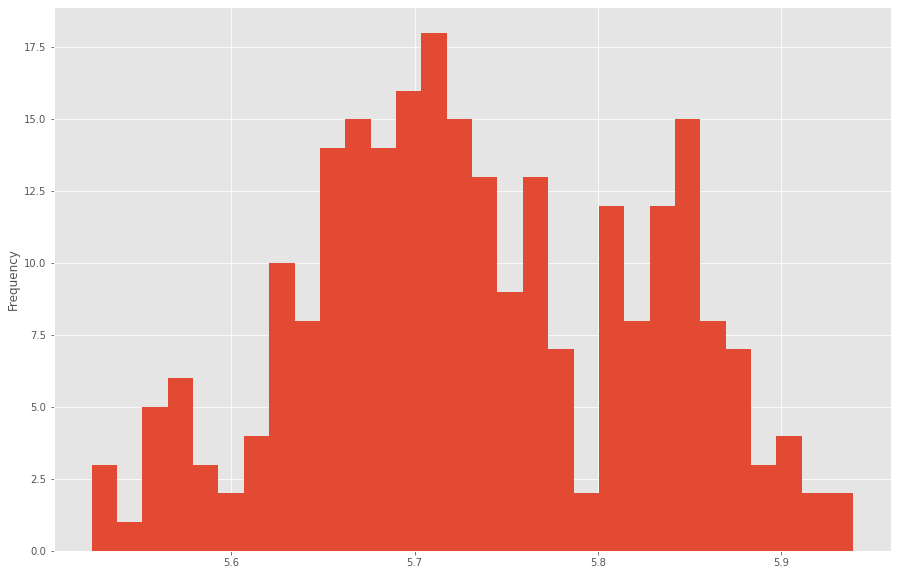

In [10]:
tesla.Closelog.plot(kind = "hist", bins = 30)

<AxesSubplot:>

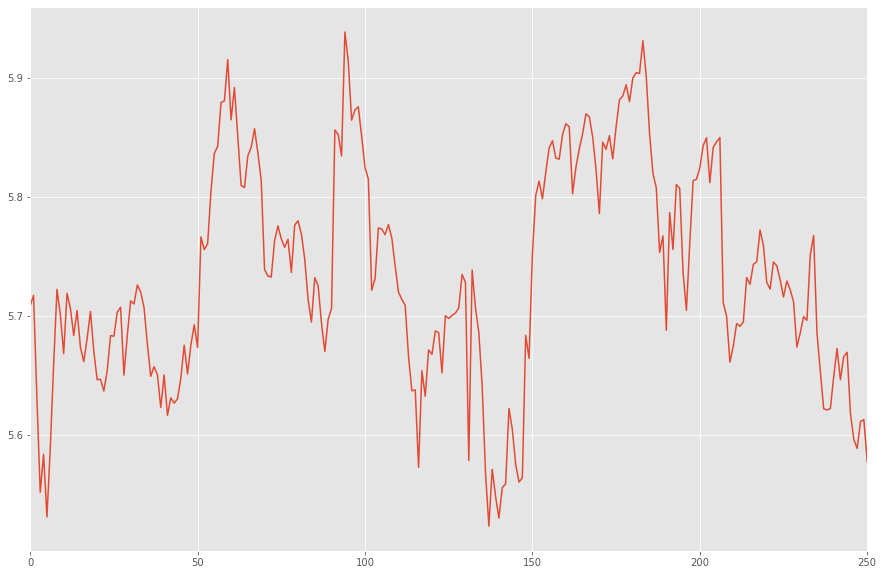

In [11]:
tesla.Closelog.plot()

C:\ProgramData\Anaconda3\envs\tensorflow-cpu\lib\site-packages\pandas\plotting\_matplotlib\core.py:1182: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='Date'>

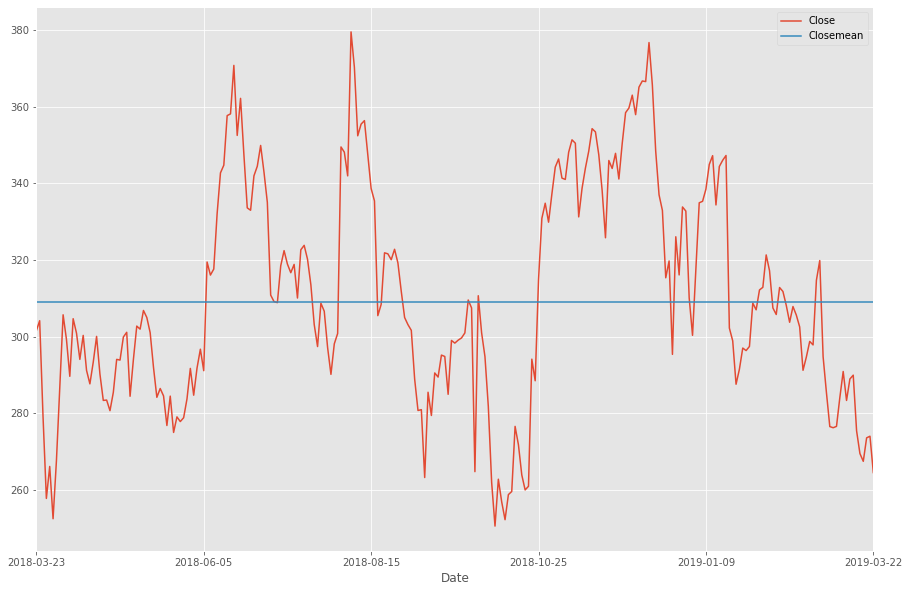

In [12]:
model_mean_pred = tesla.Closelog.mean()
# reverse log e
tesla["Closemean"] = np.exp(model_mean_pred)
tesla.plot(kind="line", x="Date", y = ["Close", "Closemean"])

In [13]:
from sklearn import linear_model
x = np.arange(tesla.shape[0]).reshape((-1,1))
y = tesla.Close.values.reshape((-1,1))
reg = linear_model.LinearRegression()
pred = reg.fit(x, y).predict(x)

C:\ProgramData\Anaconda3\envs\tensorflow-cpu\lib\site-packages\pandas\plotting\_matplotlib\core.py:1182: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='Date'>

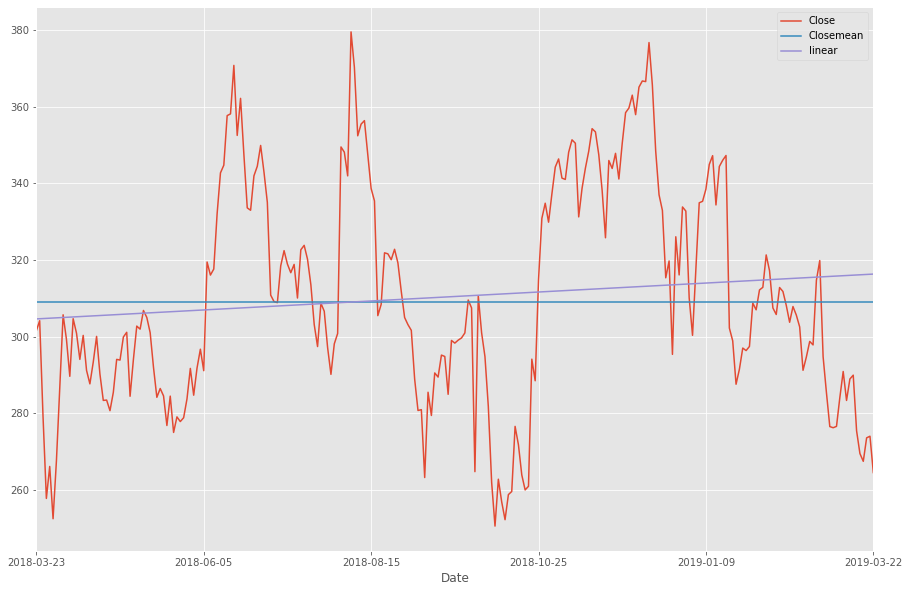

In [14]:
tesla['linear'] = pred
tesla.plot(kind="line", x="Date", y = ["Close", "Closemean", "linear"])

In [17]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.tsa.stattools import adfuller

In [18]:
tesla["CloselogShift1"] = tesla.Closelog.shift()
tesla.head()

,Date,Open,High,Low,Close,Closelog,Closemean,linear,CloselogShift1
Date,,,,,,,,,
2018-03-23,2018-03-23,311.250000,311.250000,300.450012,301.540009,5.708903,309.18009,304.644032,NaN
2018-03-26,2018-03-26,307.339996,307.589996,291.359985,304.179993,5.717620,309.18009,304.690849,5.708903
2018-03-27,2018-03-27,304.000000,304.269989,277.179993,279.179993,5.631857,309.18009,304.737667,5.717620
2018-03-28,2018-03-28,264.579987,268.679993,252.100006,257.779999,5.552107,309.18009,304.784484,5.631857
2018-03-29,2018-03-29,256.489990,270.959991,248.210007,266.130005,5.583985,309.18009,304.831302,5.552107


<AxesSubplot:xlabel='CloselogShift1', ylabel='Closelog'>

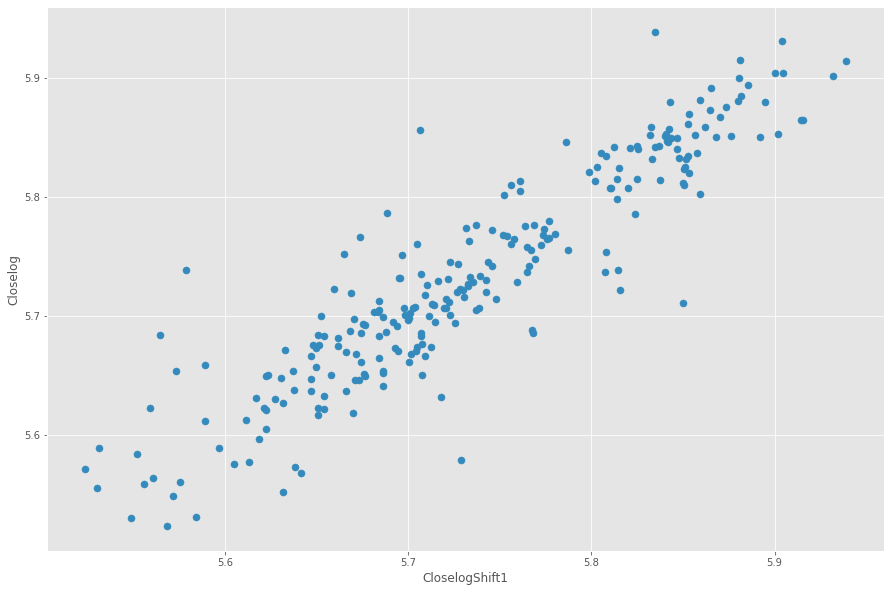

In [19]:
tesla.plot(kind= "scatter", y = "Closelog", x = "CloselogShift1", s = 50)

<AxesSubplot:xlabel='Date'>

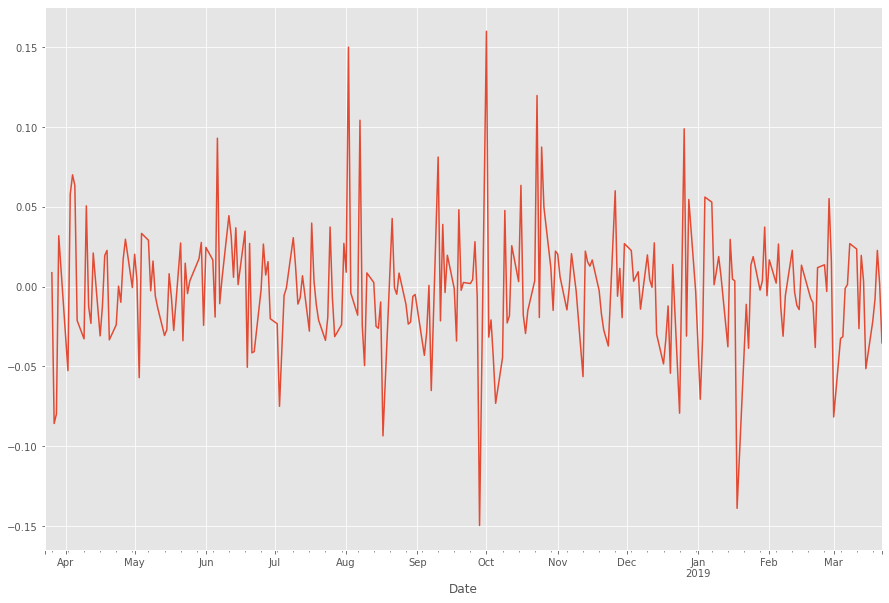

In [20]:
tesla["CloselogDiff"] = tesla.Closelog - tesla.CloselogShift1
tesla.CloselogDiff.plot()

In [21]:
tesla["CloseRandom"] = np.exp(tesla.CloselogShift1)
tesla.head()

,Date,Open,High,Low,Close,Closelog,Closemean,linear,CloselogShift1,CloselogDiff,CloseRandom
Date,,,,,,,,,,,
2018-03-23,2018-03-23,311.250000,311.250000,300.450012,301.540009,5.708903,309.18009,304.644032,NaN,NaN,NaN
2018-03-26,2018-03-26,307.339996,307.589996,291.359985,304.179993,5.717620,309.18009,304.690849,5.708903,0.008717,301.540009
2018-03-27,2018-03-27,304.000000,304.269989,277.179993,279.179993,5.631857,309.18009,304.737667,5.717620,-0.085763,304.179993
2018-03-28,2018-03-28,264.579987,268.679993,252.100006,257.779999,5.552107,309.18009,304.784484,5.631857,-0.079750,279.179993
2018-03-29,2018-03-29,256.489990,270.959991,248.210007,266.130005,5.583985,309.18009,304.831302,5.552107,0.031878,257.779999


In [22]:
def adf(ts):
    rolmean = ts.rolling(window=12).mean()
    rolstd = ts.rolling(window=12).std()

    orig = plt.plot(ts.values, color='blue',label='Original')
    mean = plt.plot(rolmean.values, color='red', label='Rolling Mean')
    std = plt.plot(rolstd.values, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    adftest = adfuller(ts, autolag='AIC')
    adfoutput = pd.Series(adftest[0:4], index=['Test Statistic','p-value','# of Lags Used',
                                              'Number of Observations Used'])
    for key,value in adftest[4].items():
        adfoutput['Critical Value (%s)'%key] = value
    return adfoutput

<AxesSubplot:xlabel='Date'>

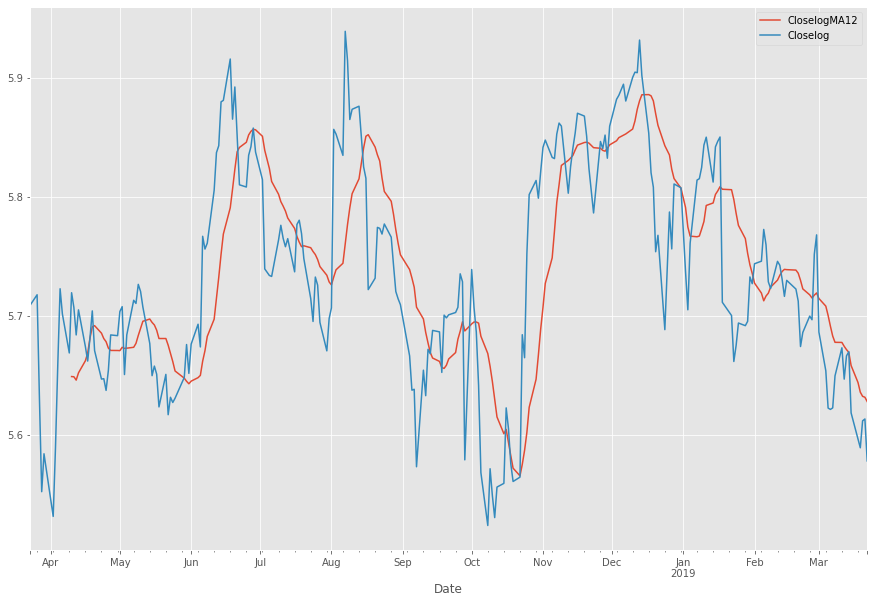

In [23]:
tesla['CloselogMA12'] = tesla.Closelog.rolling(window = 12).mean()
tesla.plot(kind ="line", y=["CloselogMA12", "Closelog"])

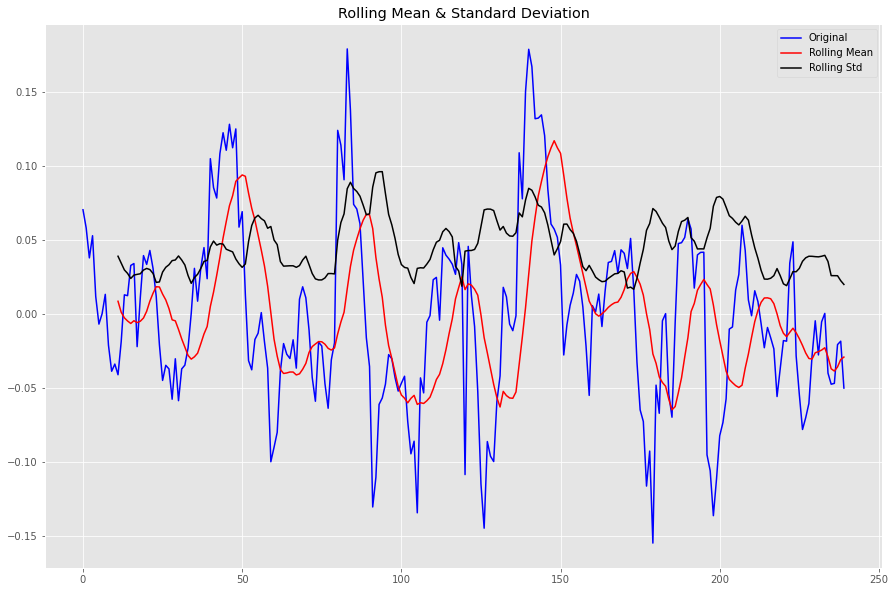

NameError: name 'adfuller' is not defined

In [45]:
ts = tesla.Closelog - tesla.CloselogMA12
ts.dropna(inplace = True)
adf(ts)

In [29]:
tesla.plot(kind ="line", y=["CloselogExp12", "Closelog"])

KeyError: "['CloselogExp12'] not in index"

In [30]:
tesla.plot(kind="line", x="timeIndex", y = ["Close", "Closemean", "pricelinear", 
                                             "CloseRandom", "CloseExp12"])

KeyError: 'timeIndex'

In [31]:
ts = tesla.Closelog - tesla.CloselogExp12
ts.dropna(inplace = True)
adf(ts)

AttributeError: 'DataFrame' object has no attribute 'CloselogExp12'

In [32]:
from statsmodels.tsa.seasonal import seasonal_decompose
tesla.index = tesla.index.to_datetime()

AttributeError: 'PeriodIndex' object has no attribute 'to_datetime'

In [33]:
decomposition = seasonal_decompose(tesla.Closelog,freq=31)

<ipython-input-33-a4c32ed2f7d3>:1: FutureWarning: the 'freq' keyword is deprecated, use 'period' instead
  decomposition = seasonal_decompose(tesla.Closelog,freq=31)


TypeError: Axis must have `freq` set to convert to Periods

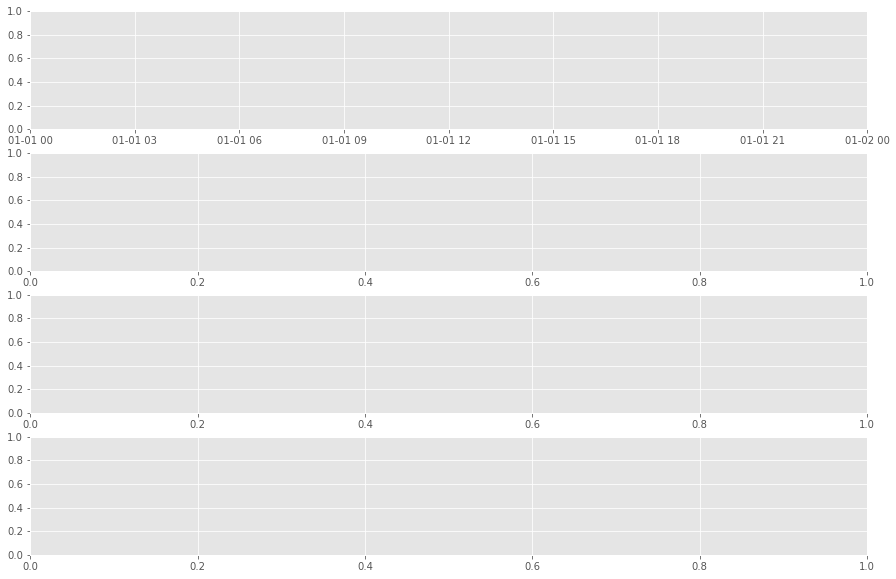

In [34]:
decomposition.plot()

In [35]:
ts = tesla.Closelog
ts_diff = tesla.CloselogDiff
ts_diff.dropna(inplace = True)

In [36]:
from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(ts_diff, nlags=20)

C:\ProgramData\Anaconda3\envs\tensorflow-cpu\lib\site-packages\statsmodels\tsa\stattools.py:665: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


In [37]:
ACF = pd.Series(lag_acf)

<AxesSubplot:>

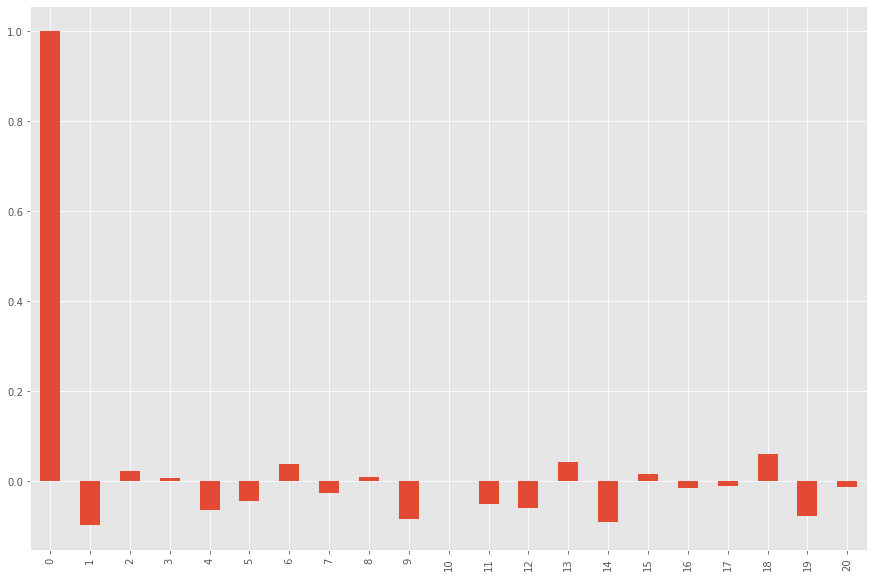

In [38]:
ACF.plot(kind = "bar")